##### Copyright 2019 The TensorFlow Authors.

In [4]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# from https://www.tensorflow.org/tutorials/quickstart/beginner

# TensorFlow 2 quickstart for beginners

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/quickstart/beginner"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

This short introduction uses [Keras](https://www.tensorflow.org/guide/keras/overview) to:

1. Load a prebuilt dataset.
1. Build a neural network machine learning model that classifies images.
2. Train this neural network.
3. Evaluate the accuracy of the model.

This tutorial is a [Google Colaboratory](https://colab.research.google.com/notebooks/welcome.ipynb) notebook. Python programs are run directly in the browser—a great way to learn and use TensorFlow. To follow this tutorial, run the notebook in Google Colab by clicking the button at the top of this page.

1. In Colab, connect to a Python runtime: At the top-right of the menu bar, select *CONNECT*.
2. To run all the code in the notebook, select **Runtime** > **Run all**. To run the code cells one at a time, hover over each cell and select the **Run cell** icon.

![Run cell icon](images/beginner/run_cell_icon.png)

## Set up TensorFlow

Import TensorFlow into your program to get started:

In [1]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.18.0


If you are following along in your own development environment, rather than [Colab](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb), see the [install guide](https://www.tensorflow.org/install) for setting up TensorFlow for development.

Note: Make sure you have upgraded to the latest `pip` to install the TensorFlow 2 package if you are using your own development environment. See the [install guide](https://www.tensorflow.org/install) for details.

## Load a dataset

Load and prepare the MNIST dataset. The pixel values of the images range from 0 through 255. Scale these values to a range of 0 to 1 by dividing the values by `255.0`. This also converts the sample data from integers to floating-point numbers:

In [ ]:
# Load the MNIST dataset (handwritten digits 0-9)
mnist = tf.keras.datasets.mnist

# Download and split the dataset into training and testing sets
# It gets split by the industry standard, 60k training, 10k validation
# In the MNIST dataset, x_train and y_train represent input data (images) and output labels (digits), respectively.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the pixel values of images from [0, 255] to [0, 1]
# This helps improve training performance by making values smaller and standardized
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


## Build a machine learning model

Build a `tf.keras.Sequential` model.

What Happens During Training?
- The input images (28×28 pixels) are flattened into a vector of 784 values.
- The first dense layer learns 128 important features from the image.
- The dropout layer prevents the model from relying too much on certain features.
- The final dense layer outputs 10 scores (one for each digit).
- Later, the softmax activation (applied in the loss function) will convert these scores into probabilities.

In [3]:
# Define a Sequential model (a linear stack of layers)
model = tf.keras.models.Sequential([
  
  # Flatten layer: Converts the 28x28 2D image into a 1D array of 784 pixels
  # This allows the dense layers to process it as a vector
  tf.keras.layers.Flatten(input_shape=(28, 28)),

  # Fully connected (Dense) layer with 128 neurons and ReLU activation
  # This layer learns features from the input image
  tf.keras.layers.Dense(128, activation='relu'),

  # Dropout layer: Randomly sets 20% of the neurons to zero during training
  # This helps prevent overfitting by making the network less dependent on specific neurons
  tf.keras.layers.Dropout(0.2),

  # Output layer: Fully connected layer with 10 neurons (one for each digit 0-9)
  # No activation function is applied here because the loss function will handle it later
  tf.keras.layers.Dense(10)
])

/Users/maxfrischknecht/.pyenv/versions/3.11.5/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[`Sequential`](https://www.tensorflow.org/guide/keras/sequential_model) is useful for stacking layers where each layer has one input [tensor](https://www.tensorflow.org/guide/tensor) and one output tensor. Layers are functions with a known mathematical structure that can be reused and have trainable variables. Most TensorFlow models are composed of layers. This model uses the [`Flatten`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten), [`Dense`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense), and [`Dropout`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout) layers.

For each example, the model returns a vector of [logits](https://developers.google.com/machine-learning/glossary#logits) or [log-odds](https://developers.google.com/machine-learning/glossary#log-odds) scores, one for each class.

In [ ]:
# Take the first image with x_train[:1] and pass it through the model
# This generates raw predictions (logits) before applying any activation function
# Converts the output from a TensorFlow tensor to a NumPy array.
predictions = model(x_train[:1]).numpy()

# Display the raw output predictions for the first image
# Since the model has an output layer with Dense(10), it returns 10 raw scores (logits).
predictions

array([[-0.7796544 , -0.5321565 ,  0.10443197,  0.13116243, -0.52779937,
        -0.09789649, -0.30350316,  0.2438251 ,  0.13155007, -0.1208468 ]],
      dtype=float32)

The `tf.nn.softmax` function converts these logits to *probabilities* for each class: 

In [6]:
# Apply softmax to convert logits into probabilities
tf.nn.softmax(predictions).numpy()

array([[0.05190968, 0.06648678, 0.12566148, 0.12906575, 0.0667771 ,
        0.10264363, 0.08356765, 0.1444574 , 0.12911579, 0.10031475]],
      dtype=float32)

Note: It is possible to bake the `tf.nn.softmax` function into the activation function for the last layer of the network. While this can make the model output more directly interpretable, this approach is discouraged as it's impossible to provide an exact and numerically stable loss calculation for all models when using a softmax output. 

Define a loss function for training using `losses.SparseCategoricalCrossentropy`.

1. tf.keras.losses.SparseCategoricalCrossentropy
    - This is a loss function used for multi-class classification problems.
    - It is designed for cases where the target labels (y_train) are integers (e.g., 0-9 for MNIST).
    - This is different from CategoricalCrossentropy, which expects one-hot encoded labels.
2. from_logits=True
    - The model’s final layer (Dense(10)) does not apply a softmax activation, so it outputs logits (raw scores).
    - Setting from_logits=True tells TensorFlow that the input to the loss function is logits, not probabilities.
    - If from_logits=False, TensorFlow assumes the model outputs already contain softmax probabilities, which is not the case here.

In [7]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

The loss function takes a vector of ground truth values and a vector of logits and returns a scalar loss for each example. This loss is equal to the negative log probability of the true class: The loss is zero if the model is sure of the correct class.

This untrained model gives probabilities close to random (1/10 for each class), so the initial loss should be close to `-tf.math.log(1/10) ~= 2.3`.

In [8]:
loss_fn(y_train[:1], predictions).numpy()

np.float32(2.2764924)

Before you start training, configure and compile the model using Keras `Model.compile`. Set the [`optimizer`](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) class to `adam`, set the `loss` to the `loss_fn` function you defined earlier, and specify a metric to be evaluated for the model by setting the `metrics` parameter to `accuracy`.

1.	The optimizer (adam) – Controls how the model updates weights. Adam (Adaptive Moment Estimation) is a popular optimization algorithm.
2.	The loss function (loss_fn) – Measures prediction error. It tells the model how far off its predictions are.
3.	The evaluation metric (accuracy) – Monitors performance during training. This tells TensorFlow to track accuracy during training. Accuracy is the percentage of correct predictions out of total predictions.

In [9]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

## Train and evaluate your model

Use the `Model.fit` method to adjust your model parameters and minimize the loss: 

In [10]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 837us/step - accuracy: 0.8594 - loss: 0.4837
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 912us/step - accuracy: 0.9560 - loss: 0.1506
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 915us/step - accuracy: 0.9678 - loss: 0.1068
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 856us/step - accuracy: 0.9739 - loss: 0.0870
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 864us/step - accuracy: 0.9767 - loss: 0.0762


The `Model.evaluate` method checks the model's performance, usually on a [validation set](https://developers.google.com/machine-learning/glossary#validation-set) or [test set](https://developers.google.com/machine-learning/glossary#test-set).

Controls the verbosity (output details) during evaluation.
- verbose=0 → No output.
- verbose=1 → Shows a progress bar.
- verbose=2 → Prints results for each epoch in a summarized format (recommended for clarity).

Log explained: 
- 313/313 → The test set is evaluated in 313 batches (because MNIST has 10,000 test images and the default batch size is 32).
- loss: 0.0873 → The final loss value.
- accuracy: 0.9754 → The final test accuracy (97.54%).

In [14]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - 441us/step - accuracy: 0.9766 - loss: 0.0744


[0.07444839179515839, 0.9765999913215637]

The image classifier is now trained to ~98% accuracy on this dataset. To learn more, read the [TensorFlow tutorials](https://www.tensorflow.org/tutorials/).

If you want your model to return a probability, you can wrap the trained model, and attach the softmax to it:

In [15]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

Output explained: A (5, 10) NumPy array, where:
- Each row represents one of the 5 images.
- Each column represents the probability of digits 0-9.
- Each row contains 10 probability values, corresponding to digits 0-9. The highest value in each row indicates the predicted digit.

In [ ]:
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[2.39266864e-08, 2.14513829e-08, 1.64246831e-06, 4.51191481e-05,
        8.17151208e-12, 7.56190218e-07, 2.87090171e-15, 9.99950171e-01,
        4.26384958e-07, 1.74426464e-06],
       [2.35523476e-08, 7.72905423e-06, 9.99989390e-01, 1.86883699e-06,
        2.97048970e-15, 9.12158782e-07, 4.32297398e-09, 4.41115487e-13,
        4.73332982e-08, 7.90382245e-13],
       [4.18347135e-08, 9.99281883e-01, 1.08800574e-04, 9.21923493e-06,
        5.35908403e-05, 3.39265375e-06, 2.62650592e-05, 2.59553868e-04,
        2.56570609e-04, 7.90560932e-07],
       [9.99683142e-01, 1.67345049e-09, 1.63052609e-04, 2.03594738e-07,
        1.00428406e-06, 1.80590018e-06, 3.51741292e-05, 9.65674262e-05,
        1.05316680e-07, 1.91172057e-05],
       [1.42779959e-06, 3.42485415e-12, 1.10253427e-06, 2.03246717e-08,
        9.84848797e-01, 1.30704114e-08, 1.46451646e-06, 7.22371915e-05,
        7.50052607e-07, 1.50742857e-02]], dtype=float32)>

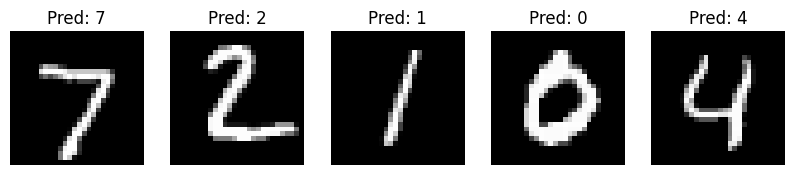

In [19]:
# To get the predicted digits, use argmax() to find the index of the highest probability in each row:
import matplotlib.pyplot as plt
import numpy as np

# Get the first 5 test images
images = x_test[:5]

# Get model predictions
predictions = probability_model(images)
predicted_labels = np.argmax(predictions, axis=1)

# Plot the images with predicted labels
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)  # Create a subplot for each image
    plt.imshow(images[i], cmap='gray')  # Display the image in grayscale
    plt.title(f"Pred: {predicted_labels[i]}")  # Set title with prediction
    plt.axis('off')  # Hide axes

plt.show()

## Conclusion

Congratulations! You have trained a machine learning model using a prebuilt dataset using the [Keras](https://www.tensorflow.org/guide/keras/overview) API.

For more examples of using Keras, check out the [tutorials](https://www.tensorflow.org/tutorials/keras/). To learn more about building models with Keras, read the [guides](https://www.tensorflow.org/guide/keras). If you want learn more about loading and preparing data, see the tutorials on [image data loading](https://www.tensorflow.org/tutorials/load_data/images) or [CSV data loading](https://www.tensorflow.org/tutorials/load_data/csv).
